### **Context**

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

### **Content**

This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

### **Acknowledgements**

This public dataset is part of Airbnb, and the original source can be found on this website.

### **Inspiration**

* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set_theme()

In [3]:
data = pd.read_csv("../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv")
data.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [4]:
print("Number of rows     :{}".format(data.shape[0]))
print("Number of columns  :{}".format(data.shape[1]))

Number of rows     :48895
Number of columns  :16


In [5]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
data.dropna(inplace = True)

In [7]:
#len(data.duplicated())
data.drop_duplicates(inplace = True)

In [8]:
data.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38821 entries, 0 to 38820
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           38821 non-null  int64  
 1   id                              38821 non-null  int64  
 2   name                            38821 non-null  object 
 3   host_id                         38821 non-null  int64  
 4   host_name                       38821 non-null  object 
 5   neighbourhood_group             38821 non-null  object 
 6   neighbourhood                   38821 non-null  object 
 7   latitude                        38821 non-null  float64
 8   longitude                       38821 non-null  float64
 9   room_type                       38821 non-null  object 
 10  price                           38821 non-null  int64  
 11  minimum_nights                  38821 non-null  int64  
 12  number_of_reviews               

In [9]:
data['last_review'] = data['last_review'].astype('datetime64[ns]')
data['last_review_day'] = data['last_review'].dt.day
data['last_review_month'] = data['last_review'].dt.month
data['last_review_year'] = data['last_review'].dt.year

In [10]:
data.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
5  5099         Large Cozy 1 BR Apartment In Midtown East     7322   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   
5        Chris           Manhattan   Murray Hill  40.74767  -73.97500   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   
5  Entire home/apt    200               3                 74  2019-06-22   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.38                               2               355   
3               4.64                               1               194   
4               0.10                               1                 0   
5               0.59                               1               129   

   last_review_day  last_review_month  last_review_year  
0               19                 10              2018  
1               21                  5              2019  
3                5                  7              2019  
4               19                 11              2018  
5               22                  6              2019

In [11]:
data.describe()

id       host_id      latitude     longitude         price  \
count  3.882100e+04  3.882100e+04  38821.000000  38821.000000  38821.000000   
mean   1.810081e+07  6.424582e+07     40.728129    -73.951149    142.332526   
std    1.069372e+07  7.589752e+07      0.054991      0.046693    196.994756   
min    2.539000e+03  2.438000e+03     40.506410    -74.244420      0.000000   
25%    8.721444e+06  7.029525e+06     40.688640    -73.982460     69.000000   
50%    1.887286e+07  2.837092e+07     40.721710    -73.954810    101.000000   
75%    2.756746e+07  1.018905e+08     40.762990    -73.935020    170.000000   
max    3.645581e+07  2.738417e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    38821.000000       38821.000000       38821.000000   
mean         5.869220          29.290255           1.373229   
std         17.389026          48.182900           1.680328   
min          1.000000           1.000000           0.010000   
25%          1.000000           3.000000           0.190000   
50%          2.000000           9.000000           0.720000   
75%          4.000000          33.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  last_review_day  \
count                    38821.000000      38821.000000     38821.000000   
mean                         5.166611        114.886299        15.792509   
std                         26.302954        129.529950         9.881894   
min                          1.000000          0.000000         1.000000   
25%                          1.000000          0.000000         6.000000   
50%                          1.000000         55.000000        17.000000   
75%                          2.000000        229.000000        24.000000   
max                        327.000000        365.000000        31.000000   

       last_review_month  last_review_year  
count       38821.000000      38821.000000  
mean            6.173901       2018.288323  
std             2.531374          1.180598  
min             1.000000       2011.000000  
25%             5.000000       2018.000000  
50%             6.000000       2019.000000  
75%             7.000000       2019.000000  
max            12.000000       2019.000000

In [12]:
data.corr()

id   host_id  latitude  longitude  \
id                              1.000000  0.591480 -0.010085   0.103336   
host_id                         0.591480  1.000000  0.012823   0.141276   
latitude                       -0.010085  0.012823  1.000000   0.088259   
longitude                       0.103336  0.141276  0.088259   1.000000   
price                          -0.006696  0.006263  0.031344  -0.155298   
minimum_nights                 -0.073937 -0.051673  0.024893  -0.055414   
number_of_reviews              -0.330019 -0.141973 -0.008559   0.054746   
reviews_per_month               0.291786  0.296274 -0.010117   0.146228   
calculated_host_listings_count  0.098446  0.149417  0.004340  -0.093348   
availability_365                0.006624  0.155361 -0.021921   0.102573   
last_review_day                -0.018368 -0.014804  0.000112  -0.013533   
last_review_month              -0.051582 -0.030352 -0.002249   0.000573   
last_review_year                0.407245  0.265914 -0.020545   0.101605   

                                   price  minimum_nights  number_of_reviews  \
id                             -0.006696       -0.073937          -0.330019   
host_id                         0.006263       -0.051673          -0.141973   
latitude                        0.031344        0.024893          -0.008559   
longitude                      -0.155298       -0.055414           0.054746   
price                           1.000000        0.025501          -0.035924   
minimum_nights                  0.025501        1.000000          -0.069366   
number_of_reviews              -0.035924       -0.069366           1.000000   
reviews_per_month              -0.030623       -0.121712           0.549699   
calculated_host_listings_count  0.052895        0.073474          -0.059796   
availability_365                0.078276        0.101658           0.193409   
last_review_day                -0.007274        0.003170           0.025769   
last_review_month               0.003720       -0.013313          -0.005288   
last_review_year               -0.016673       -0.048504           0.272038   

                                reviews_per_month  \
id                                       0.291786   
host_id                                  0.296274   
latitude                                -0.010117   
longitude                                0.146228   
price                                   -0.030623   
minimum_nights                          -0.121712   
number_of_reviews                        0.549699   
reviews_per_month                        1.000000   
calculated_host_listings_count          -0.009442   
availability_365                         0.185896   
last_review_day                         -0.020906   
last_review_month                        0.003225   
last_review_year                         0.423909   

                                calculated_host_listings_count  \
id                                                    0.098446   
host_id                                               0.149417   
latitude                                              0.004340   
longitude                                            -0.093348   
price                                                 0.052895   
minimum_nights                                        0.073474   
number_of_reviews                                    -0.059796   
reviews_per_month                                    -0.009442   
calculated_host_listings_count                        1.000000   
availability_365                                      0.182981   
last_review_day                                       0.014950   
last_review_month                                    -0.026642   
last_review_year                                      0.053046   

                                availability_365  last_review_day  \
id                                      0.006624        -0.018368   
host_id                                 0.155361        -0.014804   
latit

In [13]:
for i in data.columns:
    if data[i].dtype == object:
        if len(data[i].unique()) < 1000:
            print("The unique values present in", i ,"are: \n\n{}".
                  format(data[i].unique()),'\n')

The unique values present in neighbourhood_group are: 

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx'] 

The unique values present in neighbourhood are: 

['Kensington' 'Midtown' 'Clinton Hill' 'East Harlem' 'Murray Hill'
 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side' 'Chinatown'
 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene' 'Chelsea'
 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood' 'East Village'
 'Harlem' 'Greenpoint' 'Bushwick' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Flatbush' 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands'
 'Cobble Hill' 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George'
 'Highbridge' 'Financial District' 'Ridgewood' 'Morningside Heights'
 'Jamaica' 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsv

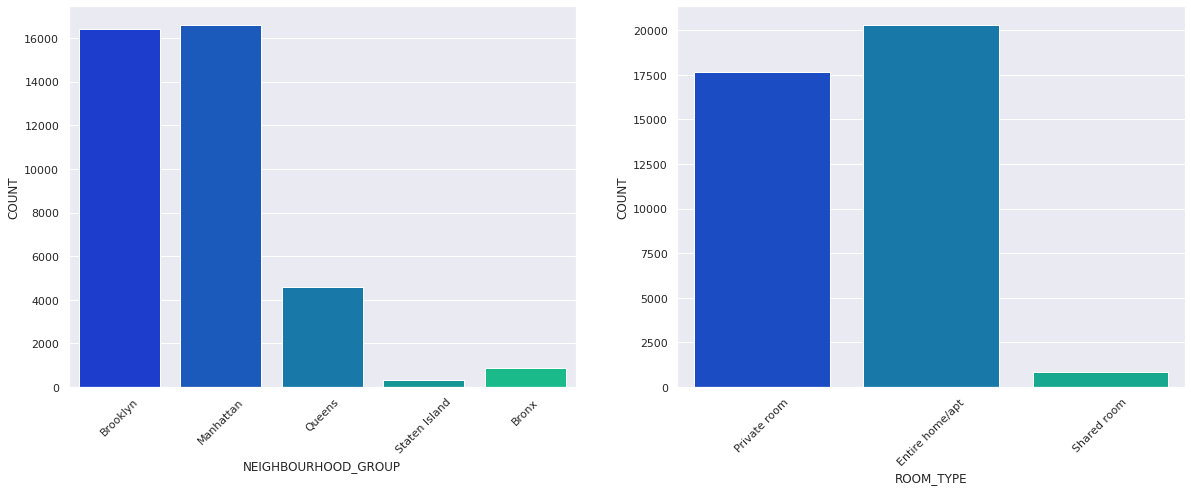

In [14]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.countplot(x = data["neighbourhood_group"], palette = "winter")
plt.xlabel("NEIGHBOURHOOD_GROUP", fontsize = 12)
plt.ylabel("COUNT", fontsize = 12)
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
sns.countplot(x = data["room_type"], palette = "winter")
plt.xlabel("ROOM_TYPE", fontsize = 12)
plt.ylabel("COUNT", fontsize = 12)
plt.xticks(rotation = 45)
plt.show()

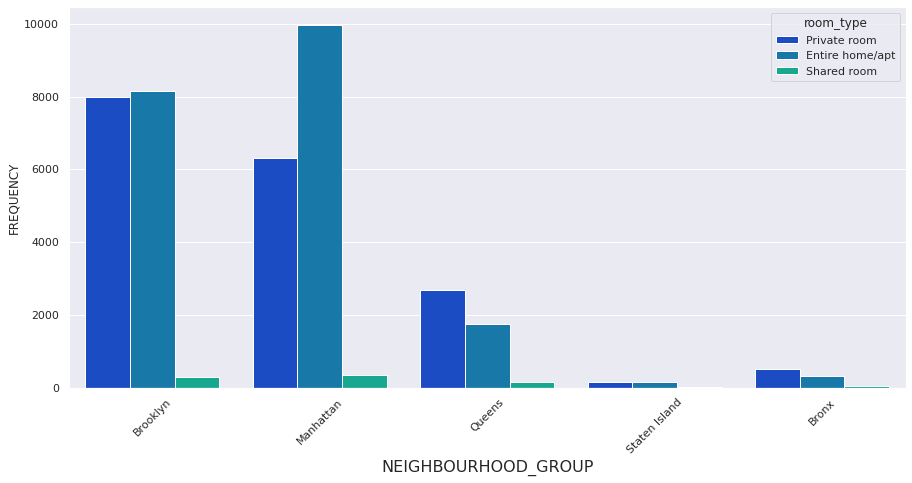

In [15]:
plt.figure(figsize=(15,7))
sns.countplot(x = data["neighbourhood_group"], hue = data["room_type"], palette = "winter")
plt.xlabel("NEIGHBOURHOOD_GROUP", fontsize = 16)
plt.ylabel("FREQUENCY", fontsize = 12)
plt.xticks(rotation = 45)
plt.show()

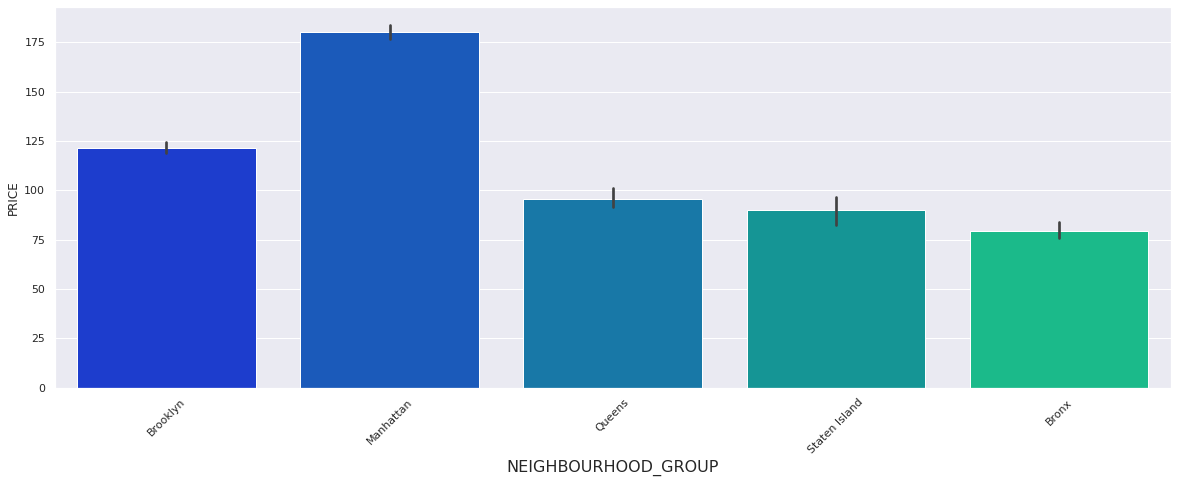

In [16]:
plt.figure(figsize=(20,7))
sns.barplot(x = data["neighbourhood_group"], y = data["price"], palette = "winter")
#sns.barplot(x = data["neighbourhood_group"], y = data["price"], color = "blue")
#sns.scatterplot(x = data["neighbourhood_group"], y = data["price"], color = "crimson")
plt.xlabel("NEIGHBOURHOOD_GROUP", fontsize = 16)
plt.ylabel("PRICE", fontsize = 12)
plt.xticks(rotation = 45)
plt.show()

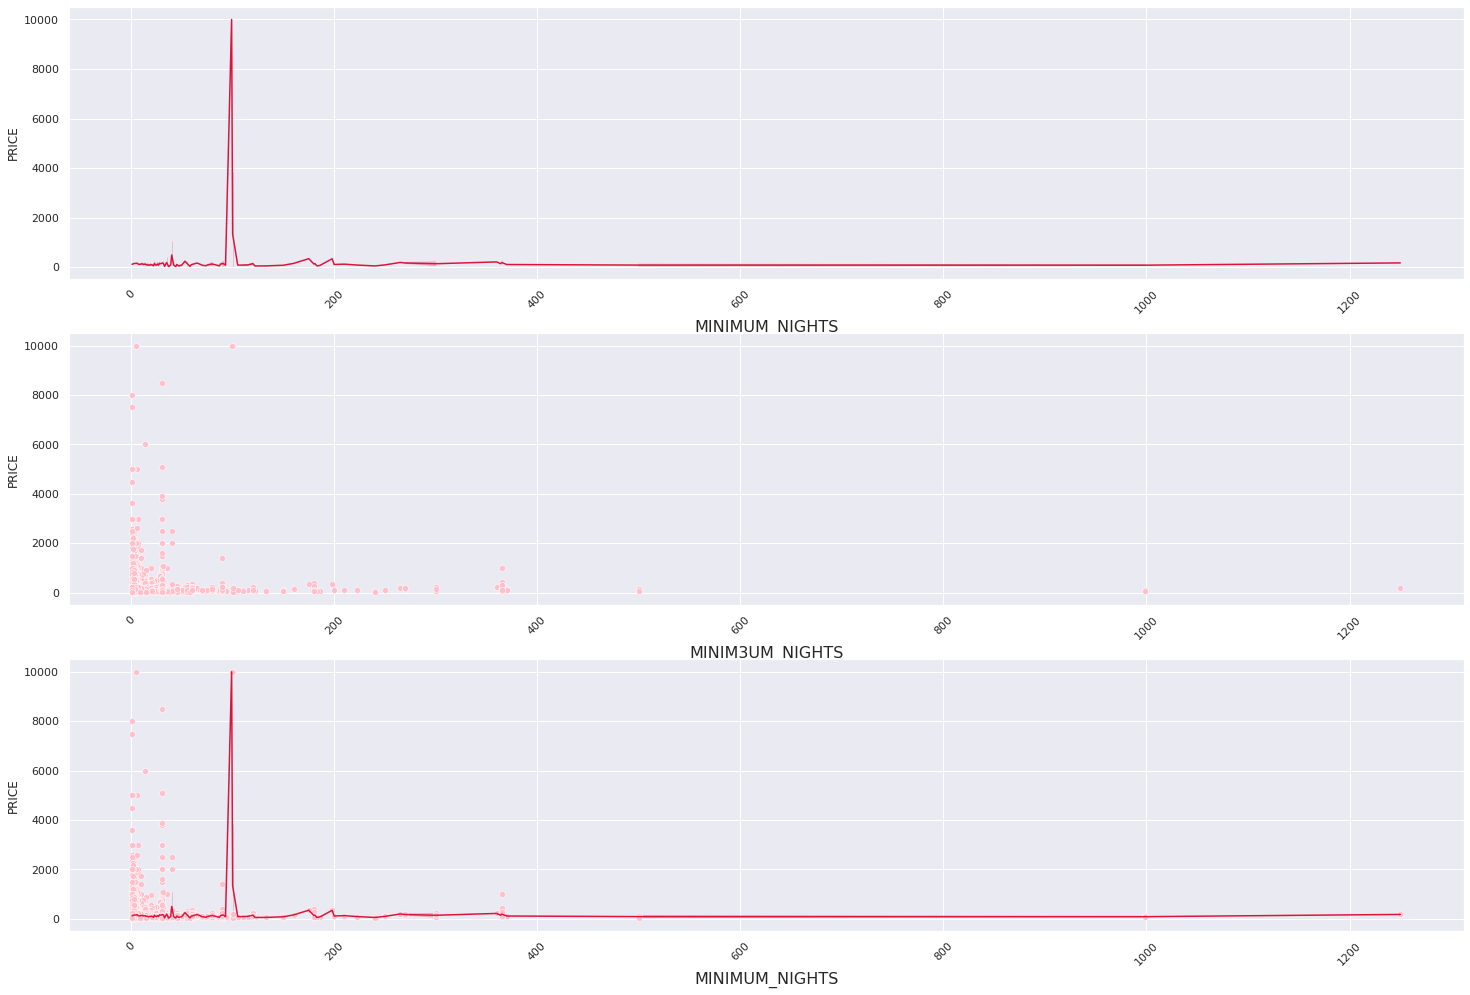

In [17]:
plt.figure(figsize=(25,17))

plt.subplot(3,1,1)
sns.lineplot(x = data["minimum_nights"], y = data["price"], color = "crimson")
#sns.scatterplot(x = data["minimum_nights"], y = data["price"], color = "crimson")
plt.xlabel("MINIMUM_NIGHTS", fontsize = 16)
plt.ylabel("PRICE", fontsize = 12)
plt.xticks(rotation = 45)

plt.subplot(3,1,2)
#sns.lineplot(x = data["minimum_nights"], y = data["price"], color = "red")
sns.scatterplot(x = data["minimum_nights"], y = data["price"], color = "pink")
plt.xlabel("MINIM3UM_NIGHTS", fontsize = 16)
plt.ylabel("PRICE", fontsize = 12)
plt.xticks(rotation = 45)

plt.subplot(3,1,3)
sns.lineplot(x = data["minimum_nights"], y = data["price"], color = "crimson")
sns.scatterplot(x = data["minimum_nights"], y = data["price"], color = "pink")
plt.xlabel("MINIMUM_NIGHTS", fontsize = 16)
plt.ylabel("PRICE", fontsize = 12)
plt.xticks(rotation = 45)
plt.show()

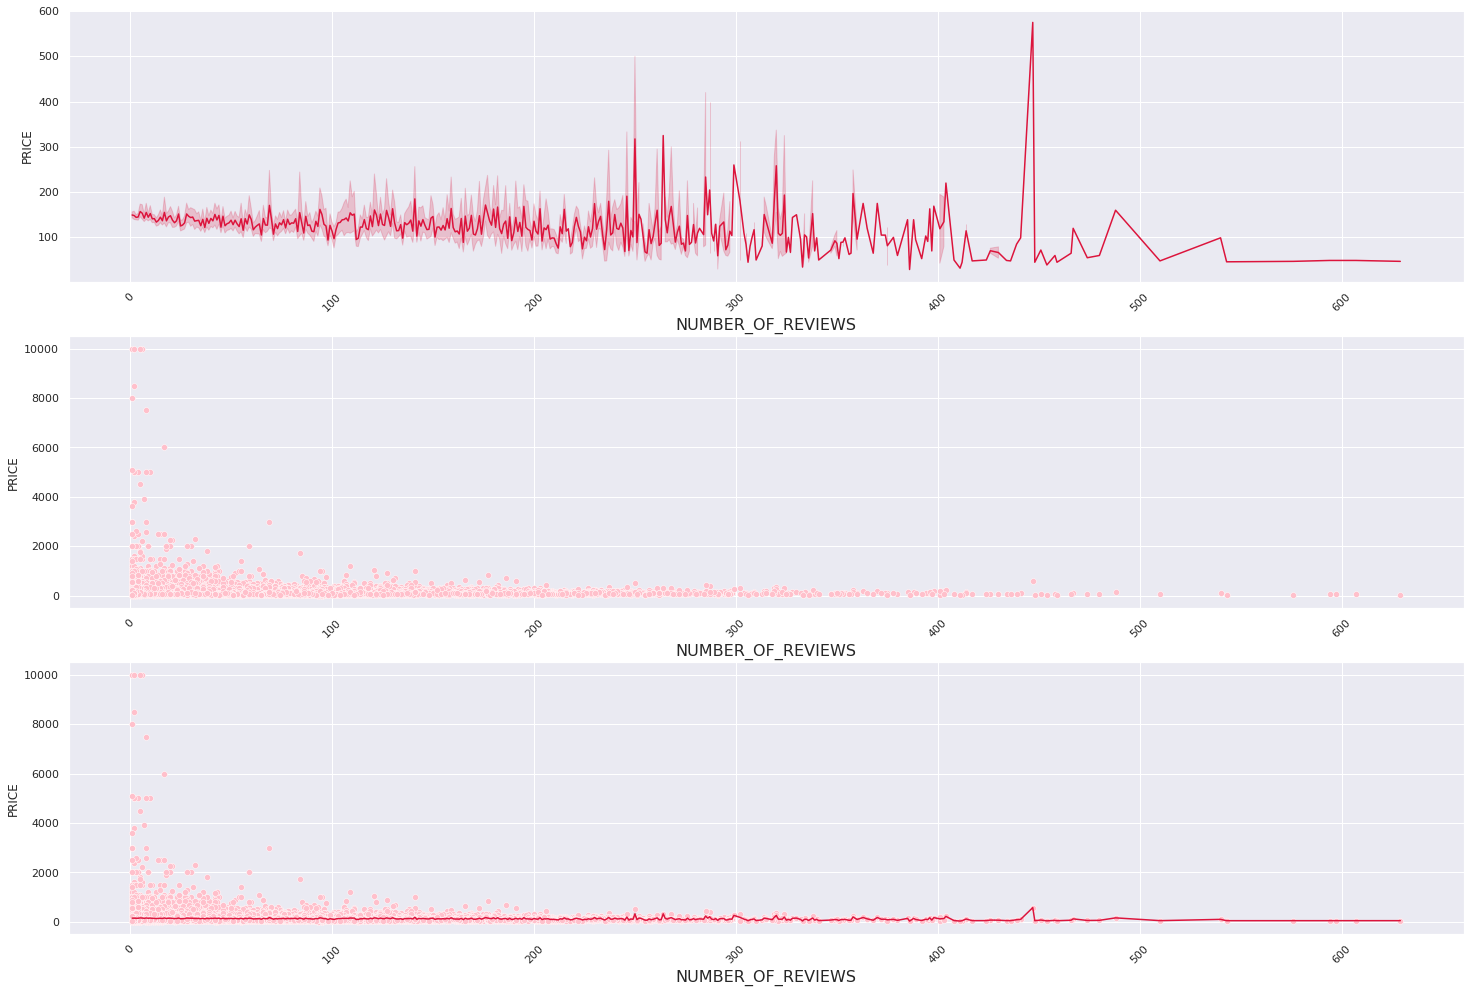

In [18]:
plt.figure(figsize=(25,17))

plt.subplot(3,1,1)
sns.lineplot(x = data["number_of_reviews"], y = data["price"], color = "crimson")
#sns.scatterplot(x = data["number_of_reviews"], y = data["price"], color = "purple")
plt.xlabel("NUMBER_OF_REVIEWS", fontsize = 16)
plt.ylabel("PRICE", fontsize = 12)
plt.xticks(rotation = 45)

plt.subplot(3,1,2)
#sns.lineplot(x = data["number_of_reviews"], y = data["price"], color = "crimson")
sns.scatterplot(x = data["number_of_reviews"], y = data["price"], color = "pink")
plt.xlabel("NUMBER_OF_REVIEWS", fontsize = 16)
plt.ylabel("PRICE", fontsize = 12)
plt.xticks(rotation = 45)

plt.subplot(3,1,3)
sns.lineplot(x = data["number_of_reviews"], y = data["price"], color = "crimson")
sns.scatterplot(x = data["number_of_reviews"], y = data["price"], color = "pink")
plt.xlabel("NUMBER_OF_REVIEWS", fontsize = 16)
plt.ylabel("PRICE", fontsize = 12)
plt.xticks(rotation = 45)
plt.show()

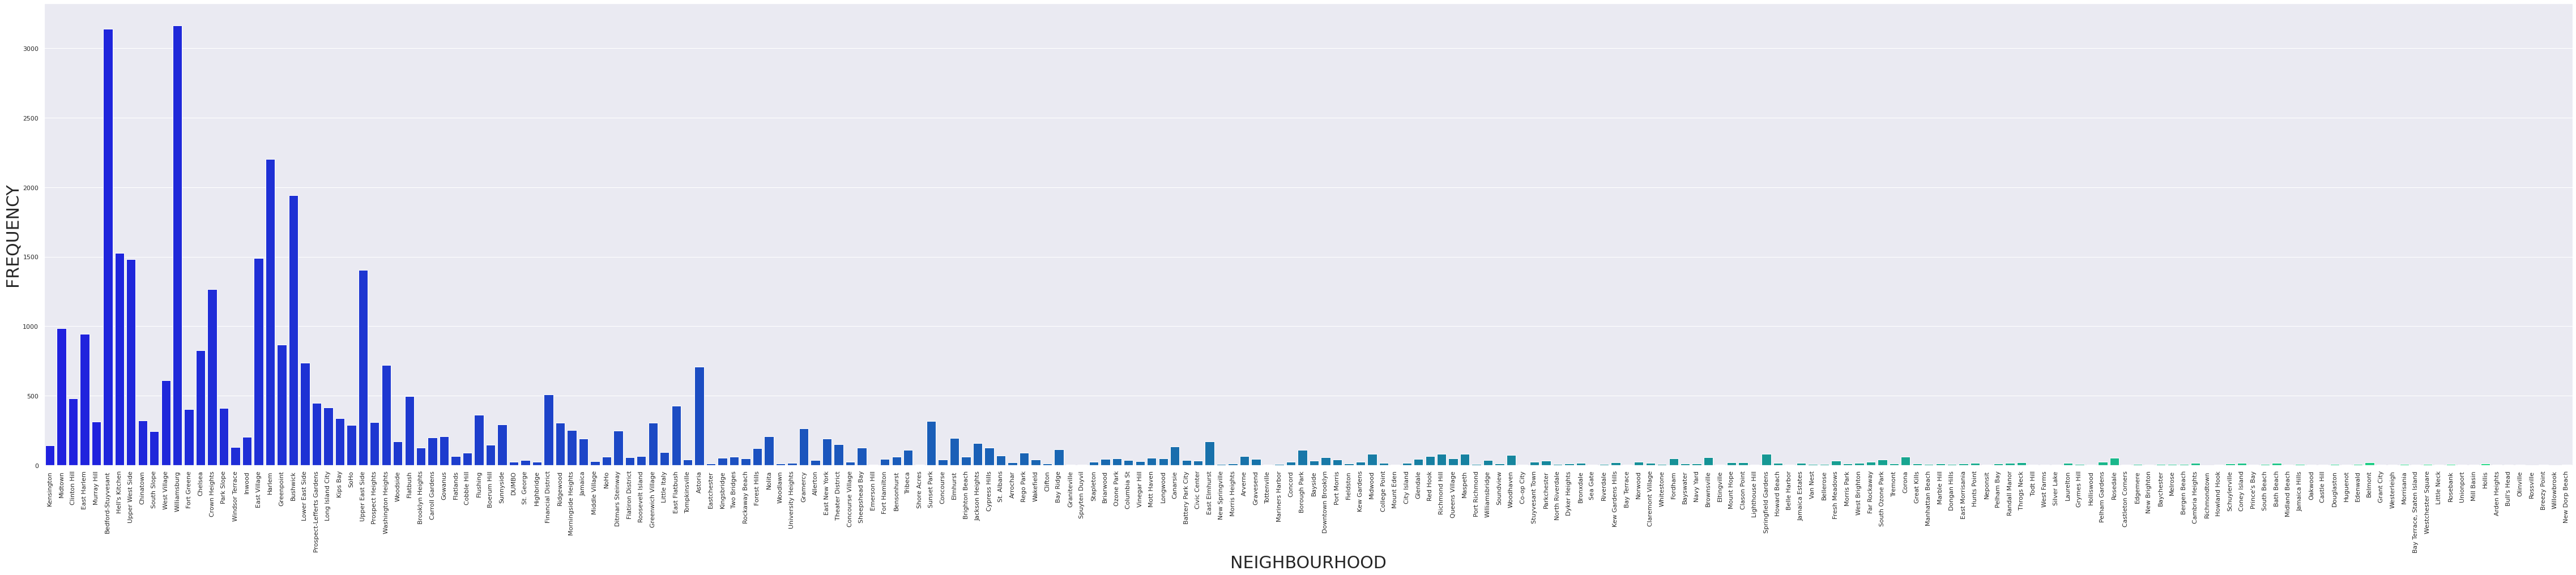

In [19]:
plt.figure(figsize=(80,15))
sns.countplot(x = data["neighbourhood"], palette = "winter")
plt.xlabel("NEIGHBOURHOOD", fontsize = 30)
plt.ylabel("FREQUENCY", fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

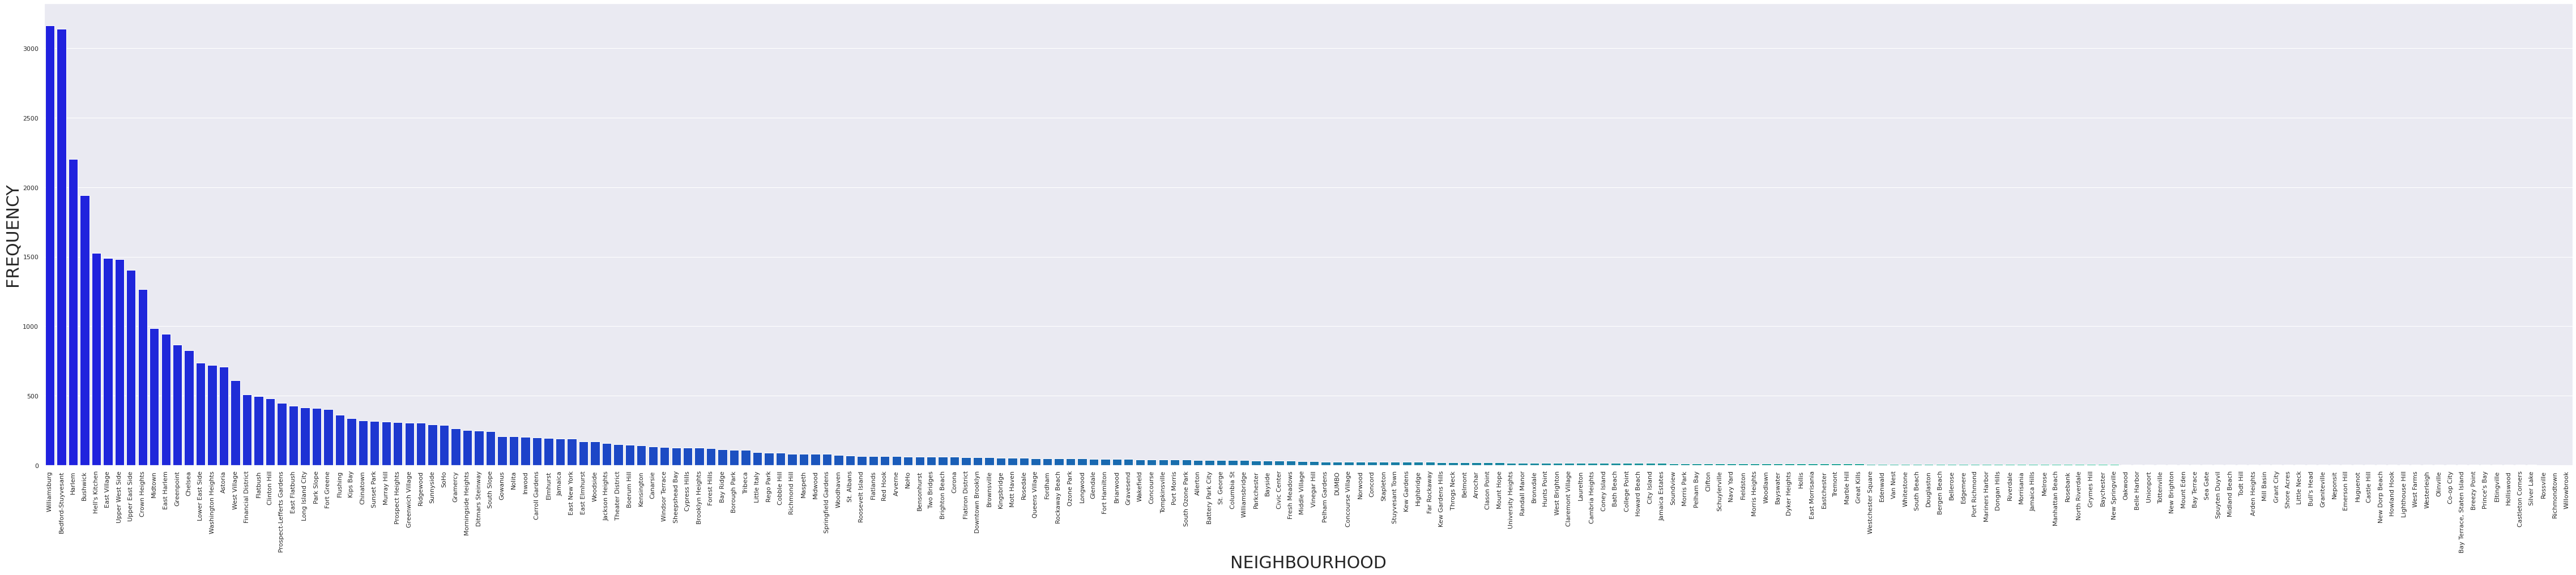

In [20]:
plt.figure(figsize=(80,15))
sns.countplot(x = data["neighbourhood"], order = data['neighbourhood'].value_counts().index, palette = "winter")
plt.xlabel("NEIGHBOURHOOD", fontsize = 30)
plt.ylabel("FREQUENCY", fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

In [21]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'last_review_day', 'last_review_month',
       'last_review_year'],
      dtype='object')

In [22]:
data = data[["neighbourhood_group","neighbourhood","latitude","longitude",
             "room_type", "price", "minimum_nights", 
             "calculated_host_listings_count", "availability_365"]]

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

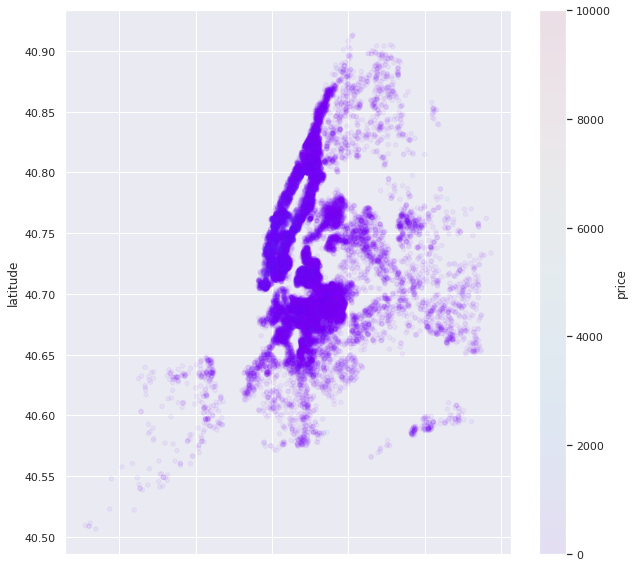

In [23]:
data.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.05,
         figsize = (10,10), c = "price", cmap = plt.get_cmap("rainbow"),
          colorbar = True
         )

In [24]:
from datashader.utils import lnglat_to_meters as webm
x, y = webm(data.longitude, data.latitude)
data['x'] = pd.Series(x)
data['y'] = pd.Series(y)

In [25]:
data.head()

neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   
5           Manhattan   Murray Hill  40.74767  -73.97500  Entire home/apt   

   price  minimum_nights  calculated_host_listings_count  availability_365  \
0    149               1                               6               365   
1    225               1                               2               355   
3     89               1                               1               194   
4     80              10                               1                 0   
5    200               3                               1               129   

              x             y  
0 -8.234567e+06  4.960485e+06  
1 -8.235836e+06  4.976068e+06  
3 -8.233163e+06  4.966010e+06  
4 -8.231407e+06  4.982667e+06  
5 -8.234859e+06  4.975194e+06

Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
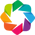

In [26]:
import holoviews as hv
import geoviews as gv
import datashader as ds
from colorcet import fire, rainbow, bgy, bjy, bkr, kb, kr
from datashader.colors import colormap_select, Greys9
from holoviews.streams import RangeXY
from holoviews.operation.datashader import datashade, dynspread, rasterize
from bokeh.io import push_notebook, show, output_notebook
output_notebook()
hv.extension('bokeh')

In [27]:
NewYork = data
agg_name = "price"
NewYork[agg_name].describe().to_frame()

price
count  38821.000000
mean     142.332526
std      196.994756
min        0.000000
25%       69.000000
50%      101.000000
75%      170.000000
max    10000.000000

In [28]:
%opts Overlay [width=800 height=600 toolbar='above' xaxis=None yaxis=None]
%opts QuadMesh [tools=['hover'] colorbar=True] (alpha=0 hover_alpha=0.2)
T = 0.05
PX = 1

def plot_map(data, label, agg_data, agg_name, cmap):
    url="http://server.arcgisonline.com/ArcGIS/rest/services/Canvas/World_Dark_Gray_Base/MapServer/tile/{Z}/{Y}/{X}.png"
    geomap = gv.WMTS(url)
    points = hv.Points(gv.Dataset(data, kdims=['x', 'y'], vdims=[agg_name]))
    agg = datashade(points, element_type=gv.Image, aggregator=agg_data, cmap=cmap)
    zip_codes = dynspread(agg, threshold=T, max_px=PX)
    hover = hv.util.Dynamic(rasterize(points, aggregator=agg_data, width=100, height=50, streams=[RangeXY]), operation=hv.QuadMesh)
    hover = hover.options(cmap=cmap)
    img = geomap * zip_codes * hover
    img = img.relabel(label)
    return img

In [29]:
plot_map(NewYork,'Hotel_Prices_in_NewYork', ds.min(agg_name), agg_name, cmap=rainbow)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y price)

#### **refrences:**
* Hands on Machine Leanring with Scikit-Learn, Keras and TensorFlow
* "Geospatial Analysis of Brazilian E commerce" notebook by Andre Sionek from Kaggle - [Link](https://www.kaggle.com/andresionek/geospatial-analysis-of-brazilian-e-commerce/comments)